In [2]:
import numpy as np
import gudhi as gd
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits

from tdamapper.cover import CubicalCover
from tdamapper.core import MapperAlgorithm
from tdamapper.plot import MapperLayoutInteractive
from sklearn.preprocessing import StandardScaler
from tdamapper.clustering import FailSafeClustering

In [3]:
X, y = load_digits(return_X_y=True)

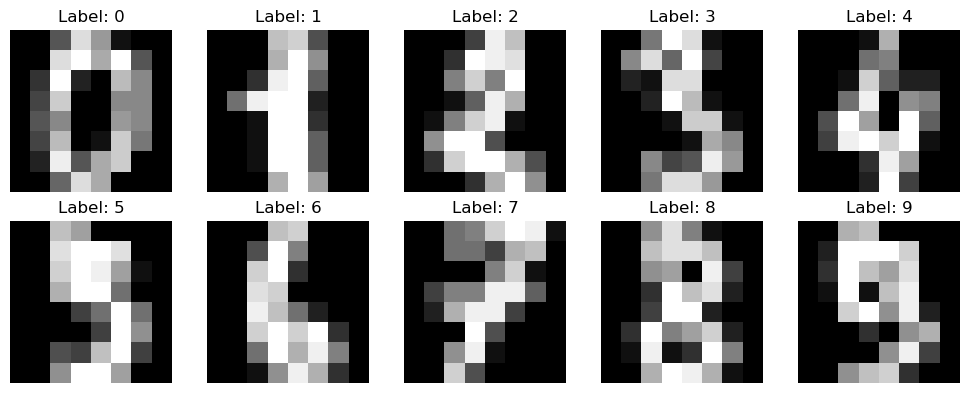

In [4]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f'Label: {y[i]}') 
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
lens = PCA(2).fit_transform(X)

mapper_algo = MapperAlgorithm(
    cover=CubicalCover(
        n_intervals=10,
        overlap_frac=0.65),
    clustering = FailSafeClustering(
        clustering = AgglomerativeClustering(10, linkage='ward'),
        verbose = False)
)
mapper_graph = mapper_algo.fit_transform(X, lens)

mapper_plot = MapperLayoutInteractive(
    mapper_graph,
    colors=y,                       
    cmap='jet',
    agg=np.nanmean,
    dim=3,
    iterations=400,
    seed=42,
    title='digit (mean)',
    width=600,
    height=600)

fig_mean1 = mapper_plot.plot()
fig_mean1.show(config={'scrollZoom': True})